In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Top_1000_IMDb_movies_New_version.csv')

data

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Description
0,0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378","Over the course of several years, two convicts..."
1,1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588","Don Vito Corleone, head of a mafia family, dec..."
2,2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087",When the menace known as the Joker wreaks havo...
3,3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886","In German-occupied Poland during World War II,..."
4,4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211",The jury in a New York City murder trial is fr...
...,...,...,...,...,...,...,...,...,...
995,995,Philomena,2013,98,7.6,77.0,37.71,"1,02,336",A world-weary political journalist picks up th...
996,996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.17,"75,004",Tells the story of a young woman's relentless ...
997,997,Shine,1996,105,7.6,87.0,35.81,"55,589","Pianist David Helfgott, driven by his father a..."
998,998,The Invisible Man,1933,71,7.6,87.0,NaN,"37,822","A scientist finds a way of becoming invisible,..."


**Content:**

This dataset boasts a rich array of movie attributes to help you delve into the realm of top-rated films:

**Movie Name:** The title of each movie, representing iconic masterpieces that have left an indelible mark on the film industry and audiences worldwide.

**Year of Release:** The year when each movie was released, providing valuable context for historical and chronological analyses.

**Watch Time:** The duration of each movie, allowing you to identify captivating films for various viewing preferences.

**Movie Rating:** IMDb's user ratings, serving as a benchmark for gauging audience reception and appreciation.

**Metascore of Movie:** Metascores from renowned critics, offering insights into the films' critical acclaim and recognition.

**Gross Earnings:** The worldwide box office earnings, reflecting the commercial success and popularity of each movie.

**Votes:** The number of votes cast by IMDb users, indicating the films' popularity and reach.

**Description:** Brief summaries that provide a glimpse into the captivating plots and themes of these cinematic marvels.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   Movie Name          1000 non-null   object 
 2   Year of Release     1000 non-null   object 
 3   Watch Time          1000 non-null   int64  
 4   Movie Rating        1000 non-null   float64
 5   Metascore of movie  845 non-null    float64
 6   Gross               838 non-null    object 
 7   Votes               1000 non-null   object 
 8   Description         1000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


In [5]:
data['Metascore of movie'].mean()

79.01183431952663

In [6]:
data['Metascore of movie'] = data['Metascore of movie'].fillna(data['Metascore of movie'].mean())

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   Movie Name          1000 non-null   object 
 2   Year of Release     1000 non-null   object 
 3   Watch Time          1000 non-null   int64  
 4   Movie Rating        1000 non-null   float64
 5   Metascore of movie  1000 non-null   float64
 6   Gross               838 non-null    object 
 7   Votes               1000 non-null   object 
 8   Description         1000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


In [8]:
data['Gross'] = data['Gross'].str.replace('#', '')
data['Gross'] = data['Gross'].fillna('0').astype(float) #No earnings information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   Movie Name          1000 non-null   object 
 2   Year of Release     1000 non-null   object 
 3   Watch Time          1000 non-null   int64  
 4   Movie Rating        1000 non-null   float64
 5   Metascore of movie  1000 non-null   float64
 6   Gross               1000 non-null   float64
 7   Votes               1000 non-null   object 
 8   Description         1000 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 70.4+ KB


In [10]:
data['Votes'] = data['Votes'].str.replace(',', '').astype(float)
data

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Description
0,0,The Shawshank Redemption,1994,142,9.3,82.000000,28.34,2777378.0,"Over the course of several years, two convicts..."
1,1,The Godfather,1972,175,9.2,100.000000,134.97,1933588.0,"Don Vito Corleone, head of a mafia family, dec..."
2,2,The Dark Knight,2008,152,9.0,84.000000,534.86,2754087.0,When the menace known as the Joker wreaks havo...
3,3,Schindler's List,1993,195,9.0,95.000000,96.90,1397886.0,"In German-occupied Poland during World War II,..."
4,4,12 Angry Men,1957,96,9.0,97.000000,4.36,824211.0,The jury in a New York City murder trial is fr...
...,...,...,...,...,...,...,...,...,...
995,995,Philomena,2013,98,7.6,77.000000,37.71,102336.0,A world-weary political journalist picks up th...
996,996,Un long dimanche de fiançailles,2004,133,7.6,76.000000,6.17,75004.0,Tells the story of a young woman's relentless ...
997,997,Shine,1996,105,7.6,87.000000,35.81,55589.0,"Pianist David Helfgott, driven by his father a..."
998,998,The Invisible Man,1933,71,7.6,87.000000,0.00,37822.0,"A scientist finds a way of becoming invisible,..."


In [11]:
data_clean = data.drop(['Unnamed: 0', 'Description'], axis = 1)

In [12]:
data_clean['Year of Release'] = data_clean['Year of Release'].str[-4:]

In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie Name          1000 non-null   object 
 1   Year of Release     1000 non-null   object 
 2   Watch Time          1000 non-null   int64  
 3   Movie Rating        1000 non-null   float64
 4   Metascore of movie  1000 non-null   float64
 5   Gross               1000 non-null   float64
 6   Votes               1000 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 54.8+ KB


## **Begin EDA**

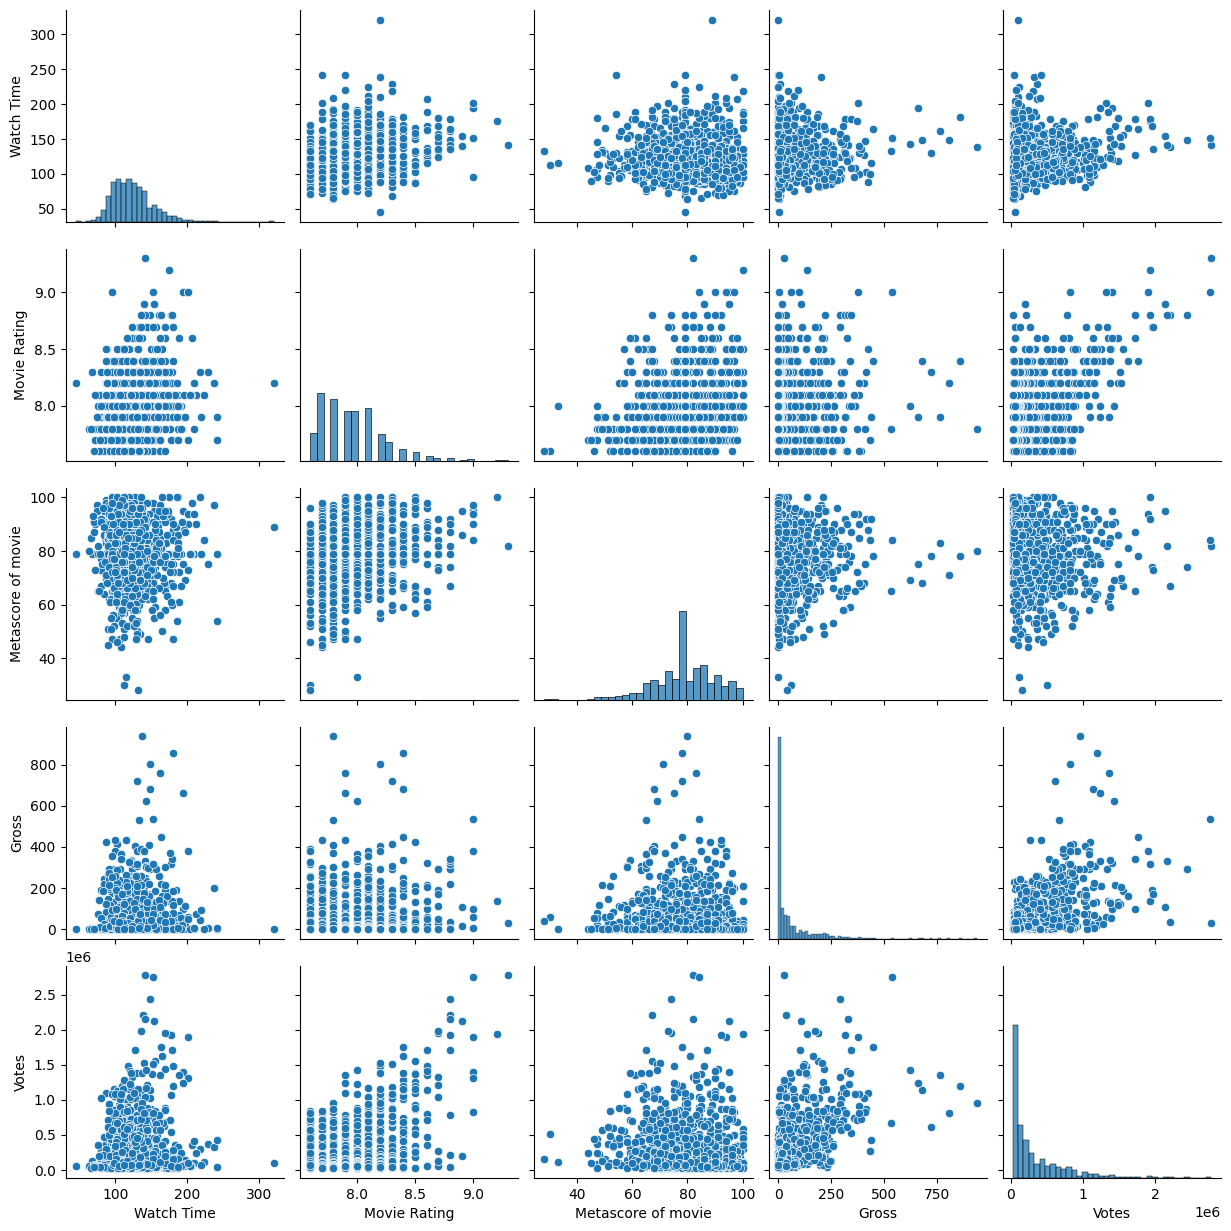

In [14]:
# Data Visualization
# Create a pair plot to visualize relationships between numeric variables
sns.pairplot(data_clean, vars=['Watch Time', 'Movie Rating','Metascore of movie', 'Gross', 'Votes'])


<AxesSubplot: >

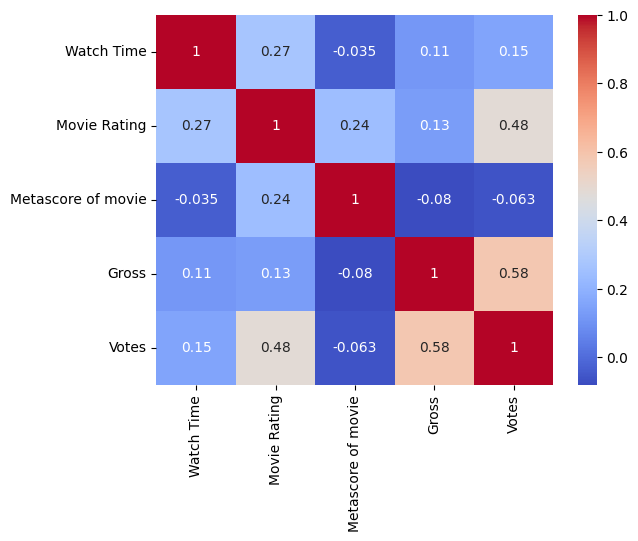

In [15]:
corr_matrix = data_clean[['Watch Time', 'Movie Rating','Metascore of movie', 'Gross', 'Votes']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

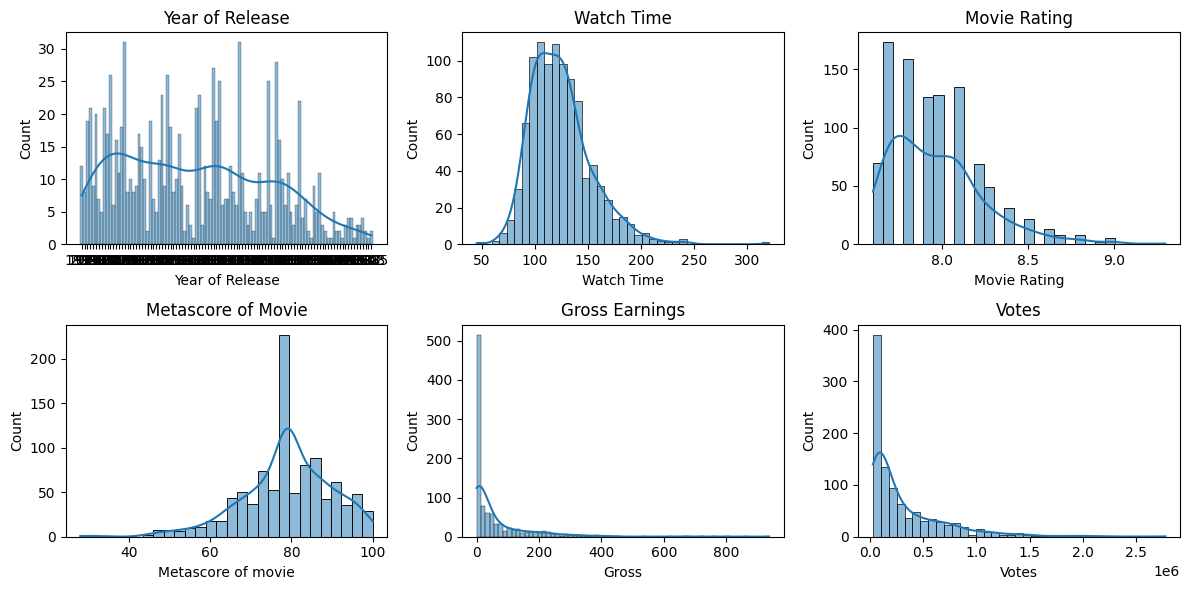

In [16]:
# Create histograms for numeric variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(data_clean['Year of Release'], kde=True)
plt.title('Year of Release')

plt.subplot(2, 3, 2)
sns.histplot(data_clean['Watch Time'], kde=True)
plt.title('Watch Time')

plt.subplot(2, 3, 3)
sns.histplot(data_clean['Movie Rating'], kde=True)
plt.title('Movie Rating')

plt.subplot(2, 3, 4)
sns.histplot(data_clean['Metascore of movie'], kde=True)
plt.title('Metascore of Movie')

plt.subplot(2, 3, 5)
sns.histplot(data_clean['Gross'], kde=True)
plt.title('Gross Earnings')

plt.subplot(2, 3, 6)
sns.histplot(data_clean['Votes'], kde=True)
plt.title('Votes')

plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='Movie Rating', ylabel='Watch Time'>

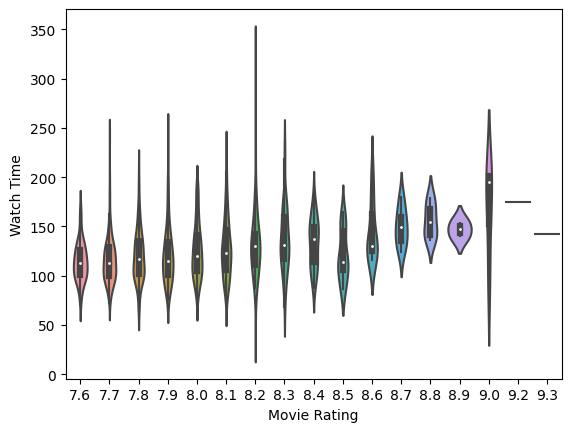

In [17]:
sns.violinplot(x='Movie Rating', y='Watch Time', data=data_clean)

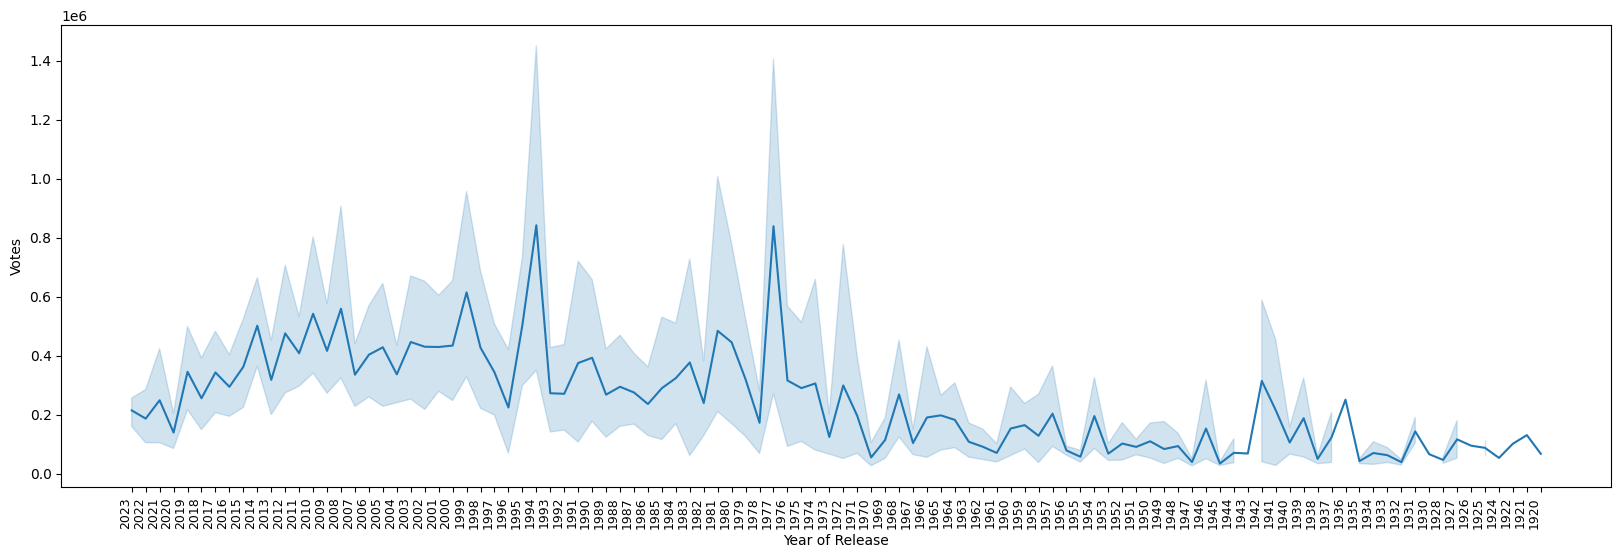

In [18]:
data_clean_sorted = data_clean.sort_values(by='Year of Release', ascending=False)


plt.figure(figsize=(20, 6))
sns.lineplot(x='Year of Release', y='Votes', data=data_clean_sorted)
plt.xticks(rotation=90, ha='right', fontsize=9)
plt.show()

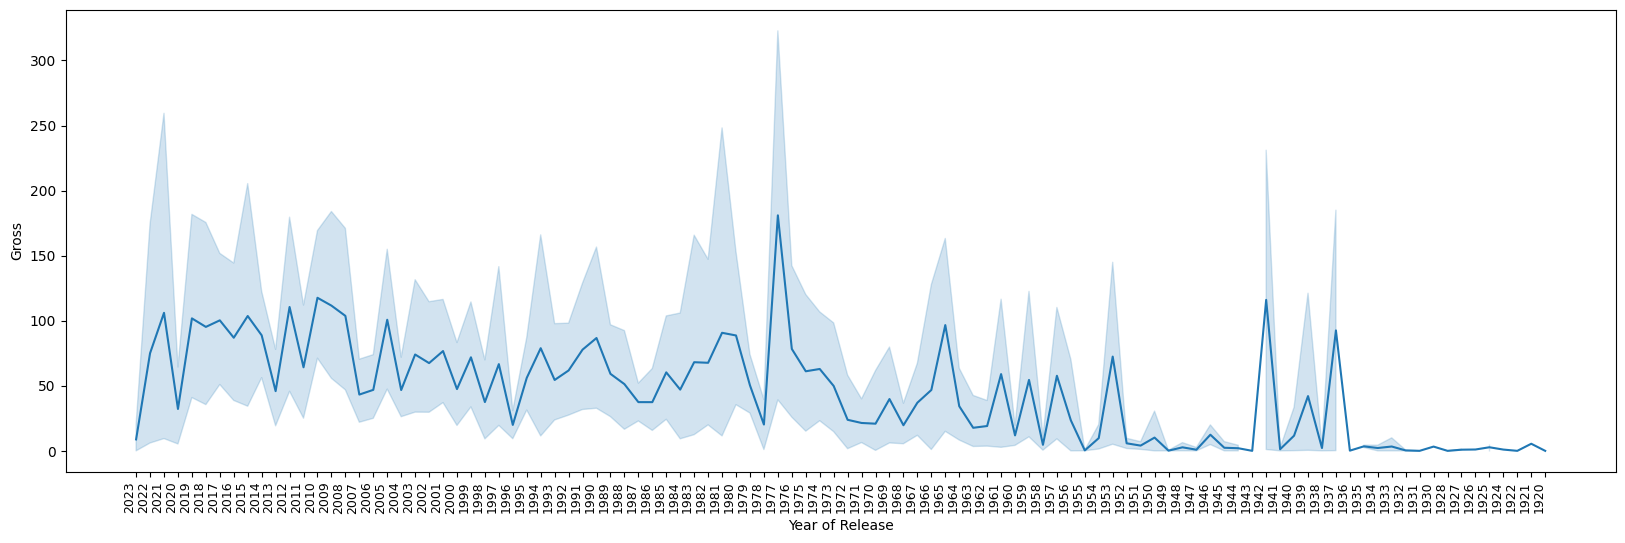

In [19]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='Year of Release', y='Gross', data=data_clean_sorted)
plt.xticks(rotation=90, ha='right', fontsize=9)
plt.show()